本文将从以下方面进行分析： 1.背景 2.提出问题 3.理解数据 4.数据清洗 5.可视化分析 6.用户流失预测 7.结论和建议

## 背景

关于用户留存有这样一个观点，如果将用户流失率降低5%，公司利润将提升25%-85%。如今高居不下的获客成本让电信运营商遭遇“天花板”，甚至陷入获客难的窘境。随着市场饱和度上升，电信运营商亟待解决增加用户黏性，延长用户生命周期的问题。因此，电信用户流失分析与预测至关重要。 数据集来自kesci中的“电信运营商客户数据集”

</br>

## 提出问题

1.分析用户特征与流失的关系。 2.从整体情况看，流失用户的普遍具有哪些特征？ 3.尝试找到合适的模型预测流失用户。 4.针对性给出增加用户黏性、预防流失的建议。

<br>

## 理解数据

根据介绍，该数据集有21个字段，共7043条记录。每条记录包含了唯一客户的特征。 我们目标就是发现前20列特征和最后一列客户是否流失特征之间的关系。

<br>

## 数据清洗

数据清洗的“完全合一”规则：

    1.完整性：单条数据是否存在空值，统计的字段是否完善。
    2.全面性：观察某一列的全部数值，通过常识来判断该列是否有问题，比如：数据定义、单位标识、数据本身。
    3.合法性：数据的类型、内容、大小的合法性。比如数据中是否存在非ASCII字符，性别存在了未知，年龄超过了150等。
    4.唯一性：数据是否存在重复记录，因为数据通常来自不同渠道的汇总，重复的情况是常见的。行数据、列数据都需要是唯一的。

导入工具包

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

导入数据集

In [2]:
customerDF = pd.read_csv('data/WA_Fn-UseC_-Telco-Customer-Churn.csv')

### 数据探查

In [3]:
# 查看数据集大小
customerDF.shape
# 运行结果：(7043, 21)

# 设置查看列不省略
pd.set_option('display.max_columns',None)

# 查看前10条数据
customerDF.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,Yes,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [4]:
# Null计数
pd.isnull(customerDF).sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [5]:
# 查看数据类型
customerDF.info()
#customerDF.dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


发现‘TotalCharges’总消费额的数据类型为字符串，应该转换为浮点型数据,将‘TotalCharges’总消费额的数据类型转换为浮点型，发现错误：字符串无法转换为数字。

In [6]:
#customerDf[['TotalCharges']].astype(float)
#ValueError: could not convert string to float: 

检查各个字段的数据类型、字段内容和数量。最后发现“TotalCharges”（总消费额）列有11个用户数据缺失

In [7]:
# 查看每一列数据取值
for x in customerDF.columns:
    # value_counts 计算每个值有多少个重复值
    # loc 使用column名和index名进行定位
    test=customerDF.loc[:,x].value_counts() # :标识取所有行数据，x表示取当前列 
    print('{0} 的行数是：{1}'.format(x,test.sum()))
    print('{0} 的数据类型是：{1}'.format(x,customerDF[x].dtypes))
    print('{0} 的内容是：\n{1}\n'.format(x,test))

customerID 的行数是：7043
customerID 的数据类型是：object
customerID 的内容是：
9029-FEGVJ    1
2958-NHPPS    1
9470-YFUYI    1
1101-SSWAG    1
2645-QTLMB    1
             ..
5373-SFODM    1
6143-JQKEA    1
0106-GHRQR    1
7779-LGOVN    1
1376-HHBDV    1
Name: customerID, Length: 7043, dtype: int64

gender 的行数是：7043
gender 的数据类型是：object
gender 的内容是：
Male      3555
Female    3488
Name: gender, dtype: int64

SeniorCitizen 的行数是：7043
SeniorCitizen 的数据类型是：int64
SeniorCitizen 的内容是：
0    5901
1    1142
Name: SeniorCitizen, dtype: int64

Partner 的行数是：7043
Partner 的数据类型是：object
Partner 的内容是：
No     3641
Yes    3402
Name: Partner, dtype: int64

Dependents 的行数是：7043
Dependents 的数据类型是：object
Dependents 的内容是：
No     4933
Yes    2110
Name: Dependents, dtype: int64

tenure 的行数是：7043
tenure 的数据类型是：int64
tenure 的内容是：
1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: tenure, Length: 73, dtype: int64

PhoneService 的行数是：7043
PhoneService 的数据类型是：object
Phon

##### 开始清洗

In [8]:
#强制转换为数字，不可转换的变为NaN  (convert_objects 在新版pandas不再适用，改为to_nummerice ，errors='coerce')
#customerDF['TotalCharges']=customerDF['TotalCharges'].convert_objects(condavert_numeric=True)
customerDF['TotalCharges']=pd.to_numeric(customerDF['TotalCharges'],errors='coerce')

In [9]:
test=customerDF.loc[:,'TotalCharges'].value_counts().sort_index()
print(test.sum())

print(customerDF.tenure[customerDF['TotalCharges'].isnull().values==True])

7032
488     0
753     0
936     0
1082    0
1340    0
3331    0
3826    0
4380    0
5218    0
6670    0
6754    0
Name: tenure, dtype: int64


In [10]:
print(customerDF.isnull().any())
print(customerDF[customerDF['TotalCharges'].isnull().values==True][['tenure','MonthlyCharges','TotalCharges']])

customerID          False
gender              False
SeniorCitizen       False
Partner             False
Dependents          False
tenure              False
PhoneService        False
MultipleLines       False
InternetService     False
OnlineSecurity      False
OnlineBackup        False
DeviceProtection    False
TechSupport         False
StreamingTV         False
StreamingMovies     False
Contract            False
PaperlessBilling    False
PaymentMethod       False
MonthlyCharges      False
TotalCharges         True
Churn               False
dtype: bool
      tenure  MonthlyCharges  TotalCharges
488        0           52.55           NaN
753        0           20.25           NaN
936        0           80.85           NaN
1082       0           25.75           NaN
1340       0           56.05           NaN
3331       0           19.85           NaN
3826       0           25.35           NaN
4380       0           20.00           NaN
5218       0           19.70           NaN
6670       0

用户即使在注册的当月流失，也需缴纳当月费用。因此将这11个用户入网时长改为1，将总消费额填充为月消费额

In [11]:
#将总消费额填充为月消费额
customerDF.loc[:,'TotalCharges'].replace(to_replace=np.nan,value=customerDF.loc[:,'MonthlyCharges'],inplace=True)
#查看是否替换成功
print(customerDF[customerDF['tenure']==0][['tenure','MonthlyCharges','TotalCharges']])

      tenure  MonthlyCharges  TotalCharges
488        0           52.55         52.55
753        0           20.25         20.25
936        0           80.85         80.85
1082       0           25.75         25.75
1340       0           56.05         56.05
3331       0           19.85         19.85
3826       0           25.35         25.35
4380       0           20.00         20.00
5218       0           19.70         19.70
6670       0           73.35         73.35
6754       0           61.90         61.90


In [12]:
# 将‘tenure’入网时长从0修改为1
customerDF.loc[:,'tenure'].replace(to_replace=0,value=1,inplace=True)
print(pd.isnull(customerDF['TotalCharges']).sum())
print(customerDF['TotalCharges'].dtypes)

0
float64


In [13]:
# 获取数据类型的描述统计信息
customerDF.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.372710,64.761692,2279.798992
std,0.368612,24.557454,30.090047,2266.730170
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


## 可视化分析

用户特征划分为用户属性、服务属性、合同属性，并从这三个维度进行可视化分析。

查看流失用户数量和占比

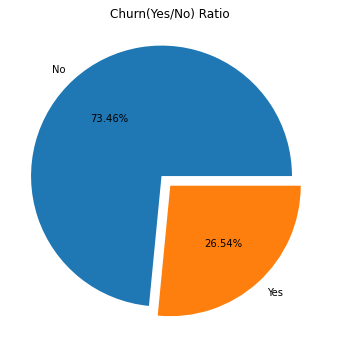

In [14]:
plt.rcParams['figure.figsize']=6,6
plt.pie(customerDF['Churn'].value_counts(),labels=customerDF['Churn'].value_counts().index,autopct='%1.2f%%',explode=(0.1,0))
plt.title('Churn(Yes/No) Ratio')
plt.show()

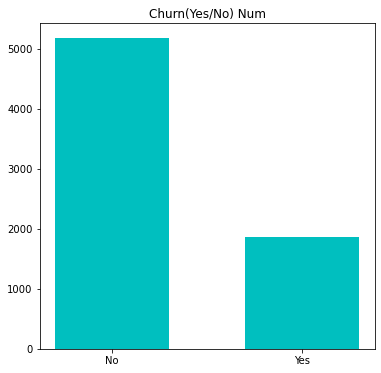

In [15]:
churnDf=customerDF['Churn'].value_counts().to_frame()
x=churnDf.index
y=churnDf['Churn']
plt.bar(x,y,width = 0.6,color = 'c')

#用来正常显示中文标签（需要安装字库）
plt.title('Churn(Yes/No) Num')
plt.show()

## 用户属性分析

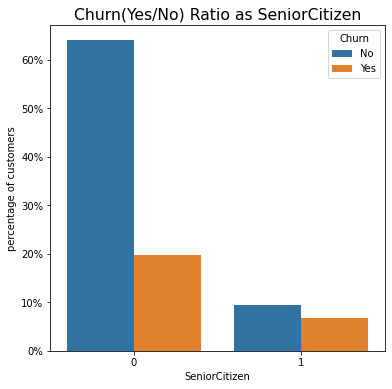

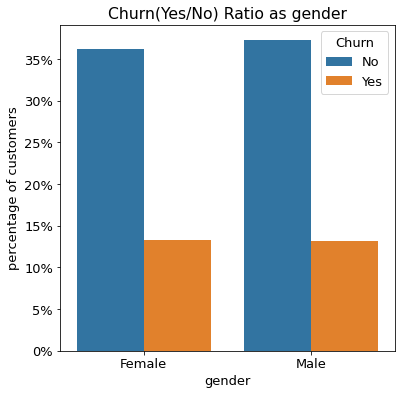

In [16]:
def barplot_percentages(feature,orient='v',axis_name="percentage of customers"):
    ratios = pd.DataFrame()
    g = (customerDF.groupby(feature)["Churn"].value_counts()/len(customerDF)).to_frame()
    g.rename(columns={"Churn":axis_name},inplace=True)
    g.reset_index(inplace=True)
 
    #print(g)
    if orient == 'v':
        ax = sns.barplot(x=feature, y= axis_name, hue='Churn', data=g, orient=orient)
        ax.set_yticklabels(['{:,.0%}'.format(y) for y in ax.get_yticks()])
        plt.rcParams.update({'font.size': 13})
        #plt.legend(fontsize=10)
    else:
        ax = sns.barplot(x= axis_name, y=feature, hue='Churn', data=g, orient=orient)
        ax.set_xticklabels(['{:,.0%}'.format(x) for x in ax.get_xticks()])
        plt.legend(fontsize=10)
    plt.title('Churn(Yes/No) Ratio as {0}'.format(feature))
    plt.show()
    
barplot_percentages("SeniorCitizen")
barplot_percentages("gender")

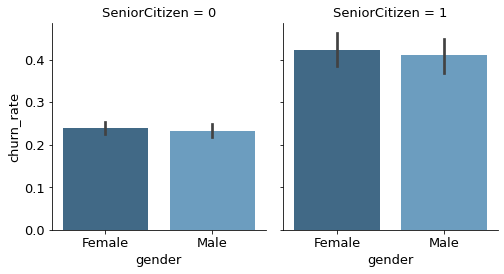

In [17]:
customerDF['churn_rate'] = customerDF['Churn'].replace("No", 0).replace("Yes", 1)

g = sns.FacetGrid(customerDF, col="SeniorCitizen", height=4, aspect=.9)
ax = g.map(sns.barplot, "gender", "churn_rate", palette = "Blues_d", order= ['Female', 'Male'])
plt.rcParams.update({'font.size': 13})
plt.show()

分析小结：用户流失与性别基本无关； 年老用户流失占显著高于年轻用户。

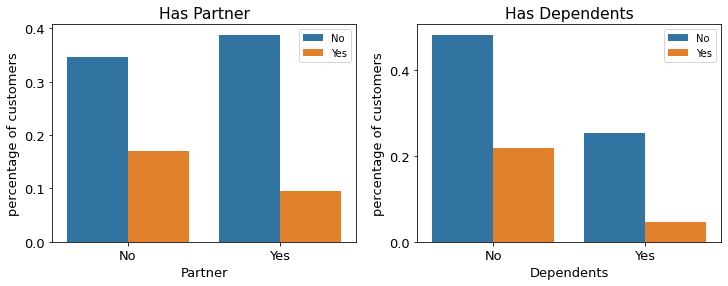

In [18]:
fig, axis = plt.subplots(1, 2, figsize=(12,4))
axis[0].set_title("Has Partner")
axis[1].set_title("Has Dependents")
axis_y = "percentage of customers"

# Plot Partner column
gp_partner = (customerDF.groupby('Partner')["Churn"].value_counts()/len(customerDF)).to_frame()
gp_partner.rename(columns={"Churn": axis_y}, inplace=True)
gp_partner.reset_index(inplace=True)
ax1 = sns.barplot(x='Partner', y= axis_y, hue='Churn', data=gp_partner, ax=axis[0])
ax1.legend(fontsize=10)
#ax1.set_xlabel('伴侣')


# Plot Dependents column
gp_dep = (customerDF.groupby('Dependents')["Churn"].value_counts()/len(customerDF)).to_frame()
#print(gp_dep)
gp_dep.rename(columns={"Churn": axis_y} , inplace=True)
#print(gp_dep)
gp_dep.reset_index(inplace=True)
#print(gp_dep)

ax2 = sns.barplot(x='Dependents', y= axis_y, hue='Churn', data=gp_dep, ax=axis[1])
#ax2.set_xlabel('家属')


#设置字体大小
plt.rcParams.update({'font.size': 20})
ax2.legend(fontsize=10)

#设置
plt.show()

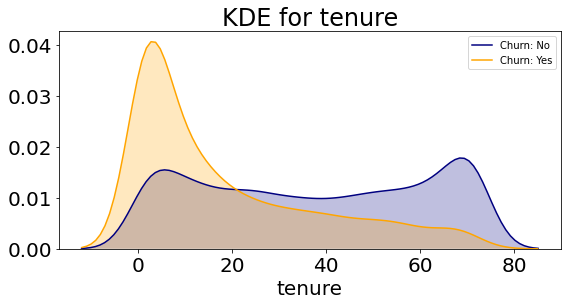

In [19]:
def kdeplot(feature,xlabel):
    plt.figure(figsize=(9, 4))
    plt.title("KDE for {0}".format(feature))
    ax0 = sns.kdeplot(customerDF[customerDF['Churn'] == 'No'][feature].dropna(), color= 'navy', label= 'Churn: No', shade='True')
    ax1 = sns.kdeplot(customerDF[customerDF['Churn'] == 'Yes'][feature].dropna(), color= 'orange', label= 'Churn: Yes',shade='True')
    plt.xlabel(xlabel)

    #设置字体大小
    plt.rcParams.update({'font.size': 20})
    plt.legend(fontsize=10)
kdeplot('tenure','tenure')
plt.show()

小结：

+ 有伴侣的用户流失占比低于无伴侣用户；
+ 有家属的用户较少；
+ 有家属的用户流失占比低于无家属用户;
+ 在网时长越久，流失率越低，符合一般经验；
+ 在网时间达到三个月，流失率小于在网率，证明用户心理稳定期一般是三个月

## 服务属性

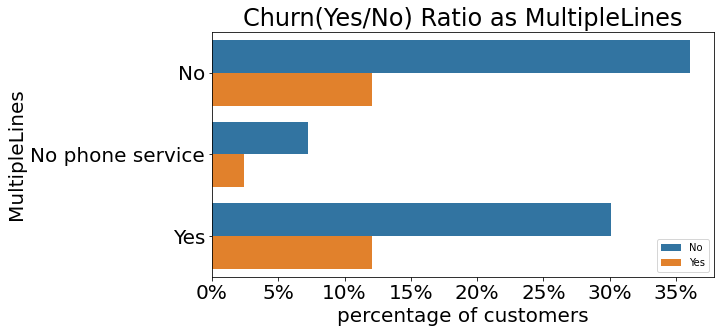

In [22]:
plt.figure(figsize=(9, 4.5))
barplot_percentages("MultipleLines", orient='h')

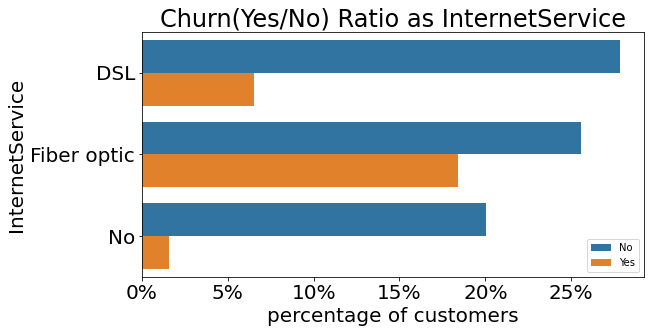

In [23]:
plt.figure(figsize=(9, 4.5))
barplot_percentages("InternetService", orient="h")

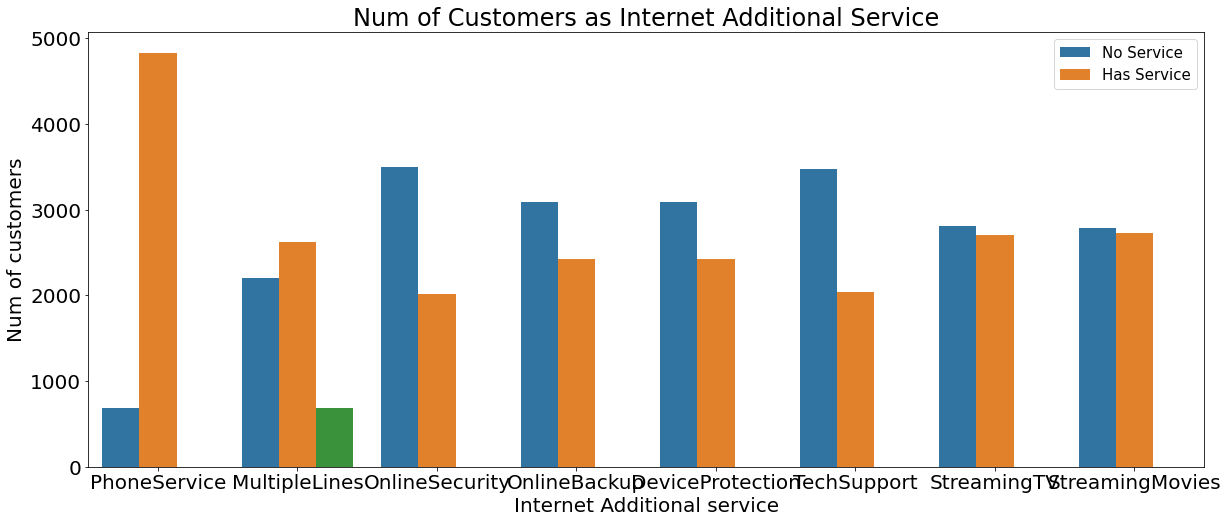

In [29]:
cols = ["PhoneService","MultipleLines","OnlineSecurity", "OnlineBackup", "DeviceProtection", "TechSupport", "StreamingTV", "StreamingMovies"]
df1 = pd.melt(customerDF[customerDF["InternetService"] != "No"][cols])
df1.rename(columns={'value': 'Has service'},inplace=True)
plt.figure(figsize=(20, 8))
ax = sns.countplot(data=df1, x='variable', hue='Has service')
ax.set(xlabel='Internet Additional service', ylabel='Num of customers')
plt.rcParams.update({'font.size':20})
plt.legend( labels = ['No Service', 'Has Service'],fontsize=15)
plt.title('Num of Customers as Internet Additional Service')
plt.show()